The data contains information from the 1990 California (a U.S. state) census. It pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns names are pretty self-explanatory.

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
# Data here is stored in  a .tsv (Tab Separated Values) format
df = pd.read_csv('california.tsv', sep='t')

In [69]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [202]:
#list of variables/columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Data Dictionary:

longitude: A measure of how far west a house is; a higher value is farther west
latitude: A measure of how far north a house is; a higher value is farther north
housing_median_age: Median age of a house within a block; a lower number is a newer building
total_rooms: Total number of rooms within a block
total_bedrooms: Total number of bedrooms within a block
population: Total number of people residing within a block
households: Total number of households, a group of people residing within a home unit, for a block
median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
median_house_value: Median house value for households within a block (US Dollars)
ocean_proximity: Location of the house to the ocean (<1H OCEAN , INLAND, NEAR OCEAN ,NEAR BAY, ISLAND)

In [16]:
df.ocean_proximity.value_counts()

<1H OCEAN     9135
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [70]:
df.shape

(20640, 10)

How many columns/features does this dataset have? (Make sure you are not counting the index):
10


How many rows/observations this dataset has?
20640

What is the median house value of the house/district located at row index #19000:

In [200]:
df.median_house_value[19000]


140100.0

How many categorical variables this dataset have?

In [201]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

How many observations have ocean_proximity value of "<1H OCEAN". Please provide your numerical answer in percentage out of total #observations.

In [203]:
df.ocean_proximity.value_counts()

<1H OCEAN     9135
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2291
ISLAND           5
Name: ocean_proximity, dtype: int64

In [216]:
val = (9135/len(df))
print(val)



percentage = "{:.0%}".format(val)
print(percentage)

0.4425872093023256
44%


How many categorical variables this dataset have?

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20639 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


How many total missing values does this dataset have?

In [92]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         1
dtype: int64

Which columns have missing values?


total_bedrooms  
ocean_proximity 


What is the best and only correct way to deal with missing values?

It depends on the case. Can be one of the other choices, however there is no one single best way.

- 15% you can drop << I think 15% is too much to drop and it should depden on the case
- Always note and justify your decision to drop/impute
- find out what the true values are (ask the source)
- ignore them
- drop the observations
- drop the columns (if 90% or more is empty)
- imputation (average, mode, ML model, ..)
- do some resarch 

How many observations have null values in two or more columns (provide your answer in terms of percentage of total observations)


In [99]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [227]:
print(df.loc[[3449]])

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3449    -118.43     34.32                34.0       2657.0           515.0   

      population  households  median_income  median_house_value  \
3449      1948.0       532.0          4.233            157400.0   

     ocean_proximity  
3449             NaN  


What is the index (row number) of the observation with null value in ocean_proximity column.

In [221]:
df[df.ocean_proximity.isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3449,-118.43,34.32,34.0,2657.0,515.0,1948.0,532.0,4.233,157400.0,NaN


How many observations have value of more than 50 in the housing median age column? 
Hint. you can use basic methods for subsetting/parsing/filtering dataframes

In [229]:
len(df[df.housing_median_age > 50 ])

1321

How many observations have housing median age value of over 50 AND ocean_proximity of "NEAR BAY"?

In [232]:
nearbay = df[df.ocean_proximity == 'NEAR BAY']
print("observations output: ", len(nearbay[nearbay.housing_median_age > 50]))

observations output:  641


What is the mean of housing_median_value column?

In [234]:
df.median_house_value.mean()

206855.81690891474

In [240]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


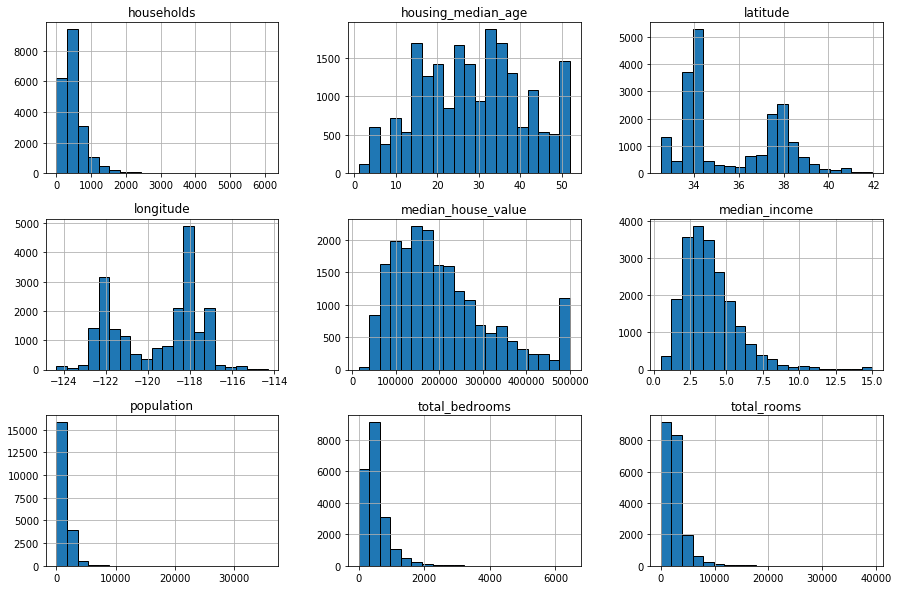

In [14]:
df.hist(edgecolor='black',bins=20)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

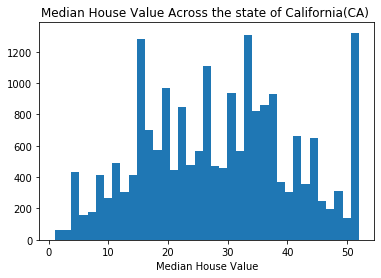

In [168]:
plt.hist(df.housing_median_age, bins='auto')
plt.title("Median House Value Across the state of California(CA) ")
plt.xlabel("Median House Value")
plt.show()

In [18]:
df['ocean_proximity'] = df['ocean_proximity'].fillna('<1H OCEAN')

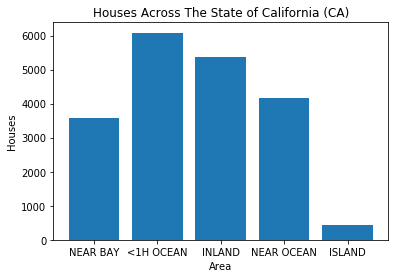

In [19]:
# plt.hist(df.housing_median_age, bins = df.households)
# plt.show()
 

plt.bar(df.ocean_proximity, df.households)
plt.xlabel("Area")
plt.ylabel("Houses")
plt.title("Houses Across The State of California (CA)")
plt.show()